In [ ]:
#Author : Karan_bhosle
# Import essential libraries for data processing, visualization, machine learning, and deep learning


import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
%matplotlib inline
from sklearn.model_selection import train_test_split
#Text pre-processing
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM,GRU,Dense,GlobalAveragePooling1D,Flatten,Dropout,Bidirectional,SpatialDropout1D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [ ]:
# Load the SMS Spam dataset from a URL using Pandas and rename columns to 'label' and 'message'

df=pd.read_csv('https://raw.githubusercontent.com/kenneth-lee-ch/SMS-Spam-Classification/master/spam.csv',encoding='ISO-8859-1')

In [ ]:
df=df[['v1','v2']]

In [ ]:
df.rename(columns={'v1':'label','v2':'message'},inplace=True)

<ipython-input-12-20f22c82c959>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'v1':'label','v2':'message'},inplace=True)


In [ ]:
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


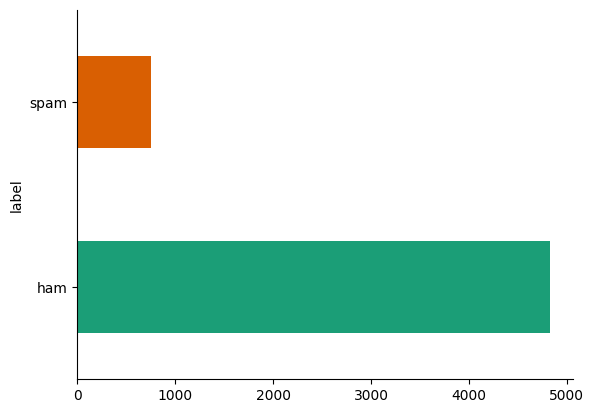

In [ ]:
# @title label

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('label').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
df.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [ ]:
df.groupby('label').describe().T

label                              ham  \
message count                     4825   
        unique                    4516   
        top     Sorry, I'll call later   
        freq                        30   

label                                                        spam  
message count                                                 747  
        unique                                                653  
        top     Please call our customer service representativ...  
        freq                                                    4

In [ ]:

# Text Cleaning for Ham Messages
hams=df[df['label']=='ham']['message']
print(hams.shape)
hams.head()




(4825,)


,message
0,"Go until jurong point, crazy.. Available only ..."
1,Ok lar... Joking wif u oni...
3,U dun say so early hor... U c already then say...
4,"Nah I don't think he goes to usf, he lives aro..."
6,Even my brother is not like to speak with me. ...


In [ ]:
ham_msg_text=''

# Iterate through each 'ham' message, split and convert words to lowercase, then join them


for val in hams:
  val=str(val)
  tokens=val.split()
  tokens=[word.lower() for word in tokens]
  ham_msg_text+=' '.join(tokens)+' '

# Display the first 500 characters of cleaned ham message text


print(ham_msg_text[:500])

go until jurong point, crazy.. available only in bugis n great world la e buffet... cine there got amore wat... ok lar... joking wif u oni... u dun say so early hor... u c already then say... nah i don't think he goes to usf, he lives around here though even my brother is not like to speak with me. they treat me like aids patent. as per your request 'melle melle (oru minnaminunginte nurungu vettam)' has been set as your callertune for all callers. press *9 to copy your friends callertune i'm gon


In [ ]:
# Text Cleaning for Spam Messages

spams=df[df['label']=='spam']['message']
print(spams.shape)
spams.head()



(747,)


,message
2,Free entry in 2 a wkly comp to win FA Cup fina...
5,FreeMsg Hey there darling it's been 3 week's n...
8,WINNER!! As a valued network customer you have...
9,Had your mobile 11 months or more? U R entitle...
11,"SIX chances to win CASH! From 100 to 20,000 po..."


In [ ]:
spam_msg_text=''

# Iterate through each 'spam' message, split and convert words to lowercase, then join them

for val in spams:
  val=str(val)
  tokens=val.split()
  tokens=[word.lower() for word in tokens]
  spam_msg_text+=' '.join(tokens)+' '

print(spam_msg_text)

free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005. text fa to 87121 to receive entry question(std txt rate)t&c's apply 08452810075over18's freemsg hey there darling it's been 3 week's now and no word back! i'd like some fun you up for it still? tb ok! xxx std chgs to send, å£1.50 to rcv winner!! as a valued network customer you have been selected to receivea å£900 prize reward! to claim call 09061701461. claim code kl341. valid 12 hours only. had your mobile 11 months or more? u r entitled to update to the latest colour mobiles with camera for free! call the mobile update co free on 08002986030 six chances to win cash! from 100 to 20,000 pounds txt> csh11 and send to 87575. cost 150p/day, 6days, 16+ tsandcs apply reply hl 4 info urgent! you have won a 1 week free membership in our å£100,000 prize jackpot! txt the word: claim to no: 81010 t&c www.dbuk.net lccltd pobox 4403ldnw1a7rw18 xxxmobilemovieclub: to use your credit, click the wap link in the next txt message or c

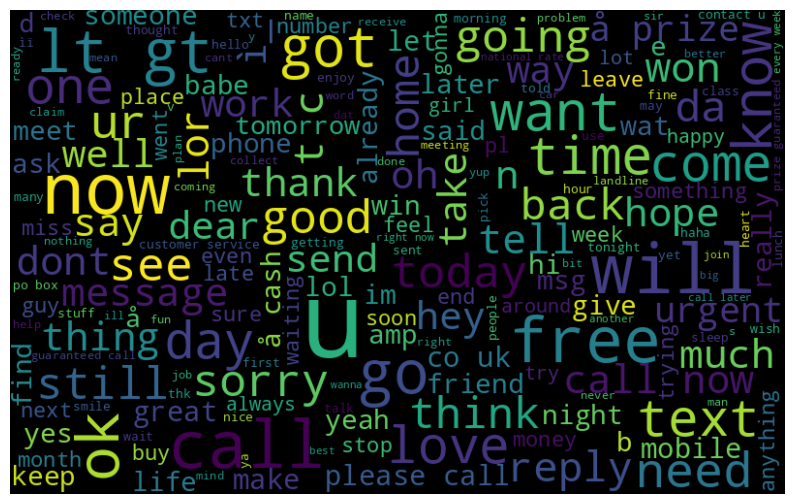

In [ ]:
# Generate and display a word cloud for ham messages


ham_msg_cloud=WordCloud(width=800,height=500,random_state=21,max_font_size=110).generate(ham_msg_text)
plt.figure(figsize=(10,7))
plt.imshow(ham_msg_cloud,interpolation='bilinear')
plt.axis('off')
plt.show()


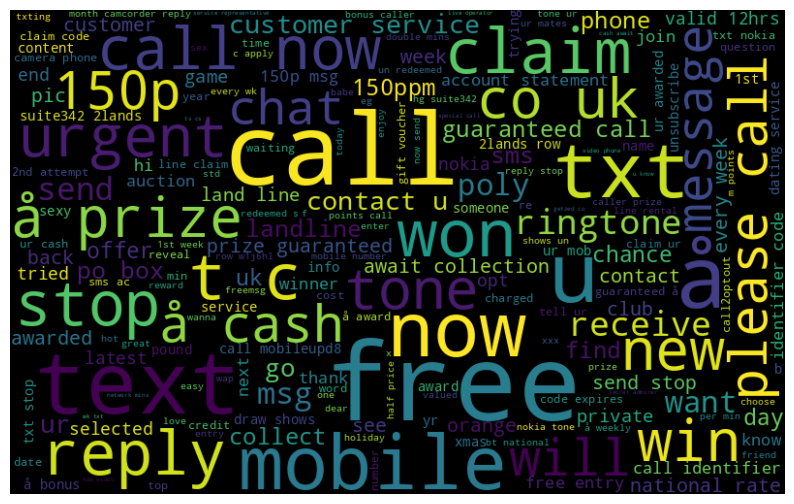

In [ ]:
# Generate and display a word cloud for spam messages


spam_msg_cloud=WordCloud(width=800,height=500,random_state=21,max_font_size=110).generate(spam_msg_text)
plt.figure(figsize=(10,7))
plt.imshow(spam_msg_cloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
# Create a balanced dataset by sampling the same number of 'ham' and 'spam' messages


hams_msg_df=hams.sample(n=len(spams),random_state=42)
spam_msg_df=spams
print(hams_msg_df.shape)
print(spam_msg_df.shape)


(747,)
(747,)


In [ ]:
# Calculate the length of each message and map 'ham' to 0 and 'spam' to 1


df['text_length']=df['message'].apply(len)
df['msg_type']=df['label'].map({'ham':0,'spam':1})
msg_label=df['msg_type'].values
df.head()

,label,message,text_length,msg_type,msg_label
0,ham,"Go until jurong point, crazy.. Available only ...",111,0,0
1,ham,Ok lar... Joking wif u oni...,29,0,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,1,1
3,ham,U dun say so early hor... U c already then say...,49,0,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,0,0


In [ ]:
# Split the dataset into training and testing sets (80% train, 20% test)


x_train,x_test,y_train,y_test=train_test_split(df['message'],msg_label,test_size=0.2,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4457,)
(1115,)
(4457,)
(1115,)


In [ ]:
from math import trunc

# Tokenization

#we need to convert

max_len = 50

trunc_type = 'post'

padding_type = 'post'

oov_tok = '<OOV>'

vocab_size = 500


In [ ]:

# Initialize the tokenizer and fit it on the training messages

tokenizer=Tokenizer(num_words=vocab_size,oov_token=oov_tok)
tokenizer.fit_on_texts(x_train)
word_index=tokenizer.word_index
total_words=len(word_index)
print(total_words)


7955


In [ ]:
# Convert training and testing messages to sequences and pad them

train_sequences=tokenizer.texts_to_sequences(x_train)
train_padded=pad_sequences(train_sequences,maxlen=max_len,padding=padding_type,truncating=trunc_type)

In [ ]:
test_sequences=tokenizer.texts_to_sequences(x_test)
test_padded=pad_sequences(test_sequences,maxlen=max_len,padding=padding_type,truncating=trunc_type)

In [ ]:
# Display the shape of the padded training and testing data

print(train_padded.shape)
print(test_padded.shape)

(4457, 50)
(1115, 50)


In [ ]:
# Define parameters for the RNN model
vocab_size = 500
embedding_dim = 16
drop_value = 0.2
n_dense = 24
n_lstm = 128
drop_lstm = 0.2

In [ ]:
# Create the Sequential model for text classification using an embedding layer and LSTM


model1=Sequential()
from tensorflow.keras.layers import Dense, Embedding, LSTM,GRU,Dense,GlobalAveragePooling1D,Flatten,Dropout,Bidirectional,SpatialDropout1D
model1.add(Embedding(vocab_size,embedding_dim,input_length=max_len))
model1.add(SpatialDropout1D(drop_value))
model1.add(LSTM(n_lstm,return_sequences=False))
model1.add(Dropout(drop_lstm))
model1.add(Dropout(drop_value))
model1.add(Dense(1,activation='sigmoid'))


# Build and summarize the model architecture


model1.build(input_shape=(None,max_len))
model1.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ (None, 50, 16)              │           8,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ spatial_dropout1d_2                  │ (None, 50, 16)              │               0 │
│ (SpatialDropout1D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 128)                 │          74,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 82,369 (321.75 KB)

 Trainable params: 82,369 (321.75 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
# Train the RNN model for 30 epochs using the training data, with validation on the test data


num_epochs=30
history=model1.fit(train_padded,y_train,epochs=num_epochs,validation_data=(test_padded,y_test),verbose=2)

Epoch 1/30
140/140 - 13s - 94ms/step - accuracy: 0.8631 - loss: 0.4087 - val_accuracy: 0.8655 - val_loss: 0.3951
Epoch 2/30
140/140 - 11s - 79ms/step - accuracy: 0.8687 - loss: 0.3749 - val_accuracy: 0.9381 - val_loss: 0.1977
Epoch 3/30
140/140 - 11s - 79ms/step - accuracy: 0.9542 - loss: 0.1442 - val_accuracy: 0.9534 - val_loss: 0.1629
Epoch 4/30
140/140 - 19s - 134ms/step - accuracy: 0.9724 - loss: 0.0956 - val_accuracy: 0.9686 - val_loss: 0.1195
Epoch 5/30
140/140 - 10s - 75ms/step - accuracy: 0.9821 - loss: 0.0719 - val_accuracy: 0.9695 - val_loss: 0.1178
Epoch 6/30
140/140 - 12s - 83ms/step - accuracy: 0.9829 - loss: 0.0721 - val_accuracy: 0.8861 - val_loss: 0.2885
Epoch 7/30
140/140 - 20s - 146ms/step - accuracy: 0.9457 - loss: 0.1502 - val_accuracy: 0.9543 - val_loss: 0.1717
Epoch 8/30
140/140 - 20s - 146ms/step - accuracy: 0.9639 - loss: 0.1051 - val_accuracy: 0.9749 - val_loss: 0.1238
Epoch 9/30
140/140 - 20s - 146ms/step - accuracy: 0.9722 - loss: 0.0928 - val_accuracy: 0.960

In [ ]:
# Define a function to predict if a new message is 'ham' or 'spam'


predict_msg=["Hello, how are you doing today?","Congratulations! You've won a free prize. Click here to claim it."]

def predict_message(predict_msg):
  new_seq=tokenizer.texts_to_sequences(predict_msg)
  padded=pad_sequences(new_seq,maxlen=max_len,padding=padding_type,truncating=trunc_type)
  pred=model1.predict(padded)


  # Classify messages as 'ham' or 'spam' based on prediction probability


  classifications = ['looks like ham' if p < 0.5 else 'looks like spam !!!!!!' for p in pred[:,0]]

  # Print predictions and classifications
  for i, msg in enumerate(predict_msg):
    print(f"Message: {msg}")
    print(f"Prediction: {pred[i][0]:.4f}")
    print(f"Classification: {classifications[i]}")
    print("-" * 20)

  return classifications

pred=predict_message(predict_msg)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
Message: Hello, how are you doing today?
Prediction: 0.0215
Classification: looks like ham
--------------------
Message: Congratulations! You've won a free prize. Click here to claim it.
Prediction: 0.5577
Classification: looks like spam !!!!!!
--------------------


In [ ]:
# Predict on additional messages to classify them as 'ham' or 'spam'

predict_msg2 = [
    "Hey there! It's been a while. How are you?",
    "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005.",
    "Urgent! Your package is delayed. Please update your delivery information.",
    "Wanna see my new pics? ;) Click here",
    "Get a free iPhone 13! Just pay shipping and handling.",
    "Your bank account has been compromised. Please call us immediately.",
    "Limited time offer! Get 50% off your next purchase.",
    "Meeting at 3 PM today. See you there.",
    "You have won a lottery! Claim your prize now.",
    "Please share your bank OTP by click on below link"
]

In [ ]:
# Call the prediction function for the new messages

def predict_message(predict_msg2):
  new_seq=tokenizer.texts_to_sequences(predict_msg2)
  padded=pad_sequences(new_seq,maxlen=max_len,padding=padding_type,truncating=trunc_type)
  pred=model1.predict(padded)

  classifications = ['looks like ham' if p < 0.5 else 'looks like spam !!!!!!' for p in pred[:,0]]

  # Print predictions and classifications
  for i, msg in enumerate(predict_msg2):
    print(f"Message: {msg}")
    print(f"Prediction: {pred[i][0]:.4f}")
    print(f"Classification: {classifications[i]}")
    print("-" * 20)

  return classifications

pred=predict_message(predict_msg2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Message: Hey there! It's been a while. How are you?
Prediction: 0.0217
Classification: looks like ham
--------------------
Message: Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005.
Prediction: 0.5577
Classification: looks like spam !!!!!!
--------------------
Message: Urgent! Your package is delayed. Please update your delivery information.
Prediction: 0.5577
Classification: looks like spam !!!!!!
--------------------
Message: Wanna see my new pics? ;) Click here
Prediction: 0.5577
Classification: looks like spam !!!!!!
--------------------
Message: Get a free iPhone 13! Just pay shipping and handling.
Prediction: 0.5577
Classification: looks like spam !!!!!!
--------------------
Message: Your bank account has been compromised. Please call us immediately.
Prediction: 0.5577
Classification: looks like spam !!!!!!
--------------------
Message: Limited time offer! Get 50% off your next purchase.
Prediction: 0.5577
Classification: lo